In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
import random

import torch
from torchvision.transforms import transforms

D:\anaconda\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.2.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
PATH = "all_data/"

Notebook that represents the effort to somewhat unify the data from the various VAP datasets.  
The data are presented in the following form:  
1. A tensor of context panels  
2. A tensor of answers  
3. A target tensor (which answer is the correct one)  

Please note that not all problems have answer tensors.

Images are in different sizes and some are greyscale, and some are RGB.

We will need to figure out which way to reshape the images, e.g. a x b x 3 or 3 x a x b for RGB

In [3]:
image_to_tensor_transform = transforms.Compose([
       transforms.PILToTensor()
])

# BongardHOI

### Description

Bongard problem on real-life images. Data is in the form of .jpg images with labels and task definition in a .json file. Each .json file contains different regime (train, test, val). What is more, different labeling regimes are present (labeled object/activity on image vs unlabelled).   
Each row of this file contains the relative paths to the images that make up a single task, along with some other more specific information. The task is comprised of 12 images segregated into 2 groups, with 2 new images added that need to be assigned to appropriate groups.

### Data Acquisition

The data images can be downloaded from [this link](https://zenodo.org/record/7079175/files/bongard_hoi_images.tar?download=1).    
The json file with labels can be downloaded from [this link](https://zenodo.org/record/7079175/files/bongard_hoi_annotations.tar?download=1).

In [1]:
import json

In [2]:
with open('all_data/BongardHOI/bongard_hoi_release/bongard_hoi_train.json') as f:
    file_hoi = json.load(f)

In [18]:
len(file_hoi)

23041

In [413]:
hoi_num = 2 # the task index

In [421]:
context = file_hoi[hoi_num][0] + file_hoi[hoi_num][1]

context = [PATH + 'BongardHOI/hake/' + c['im_path'][2:] for c in context]
context = [torch.tensor(np.array(Image.open(c))) for c in context]

In [422]:
answers = []
# adding random image as answer
answers.append(context.pop(random.randint(0, 6)))
answers.append(context.pop(random.randint(6, 12)))

In [423]:
# random answer flip
if random.uniform(0,1) <= 0.5:
    target = torch.tensor([0,1])
else:
    target = torch.tensor([1,0])
    answers = answers[::-1]

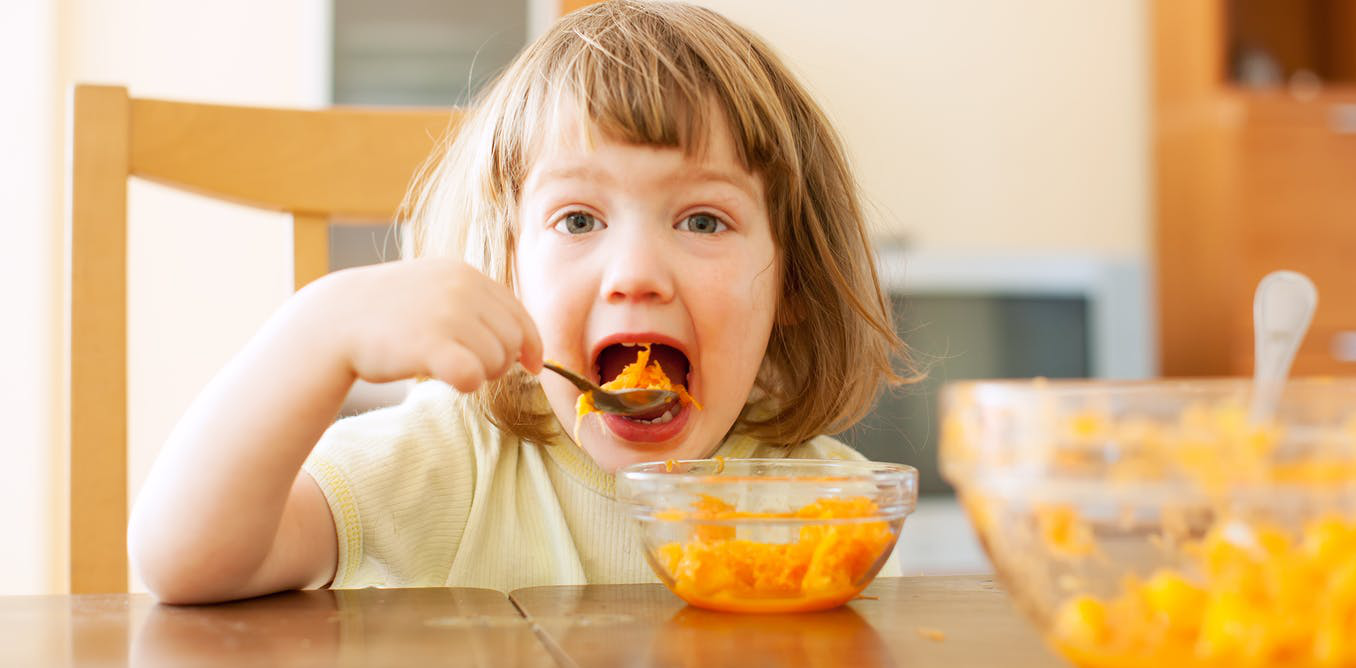

In [424]:
Image.fromarray(np.array(context[0]))

# BongardLOGO

### Description

Bongard problem on generated shapes. Each problem is defined as 14 .png files groupped into 2 folders (0 and 1). To acquire answers simply pick one of the images from each group at random. Each problem is defined inside a folder named after the regime in which it was generated.

### Data Acquisition

Data can be downloaded from [this link](https://drive.google.com/file/d/1-1j7EBriRpxI-xIVqE6UEXt-SzoWvwLx/view) (google drive)

Please note that context and answers work differently here - you need to assign each answer to one group of context panels

In [127]:
import random

context = []
answers = []
ans_idx = random.randint(0,6)
path_0 = PATH + 'BongardLogo/bd_acute_nonisosc_trapezoid-no_obtuse_angle_six_lines3_0000/0/'
for i, file_0 in enumerate(os.listdir(path_0)):
    if i == ans_idx:
        answers.append(np.array(Image.open(path_0 + file_0)))
    else:
        context.append(np.array(Image.open(path_0 + file_0)))
        
ans_idx = random.randint(0,6)
path_1 = PATH + 'BongardLogo/bd_acute_nonisosc_trapezoid-no_obtuse_angle_six_lines3_0000/1/'
for i, file_1 in enumerate(os.listdir(path_1)):
    if i == ans_idx:
        answers.append(np.array(Image.open(path_1 + file_1)))
    else:
        context.append(np.array(Image.open(path_1 + file_1)))

# random answer flip
if random.uniform(0,1) <= 0.5:
    target = torch.tensor([0,1])
else:
    target = torch.tensor([1,0])
    answers = answers[::-1]

In [128]:
context = torch.tensor(np.array(context))
answers = torch.tensor(np.array(answers))
target

tensor([1, 0])

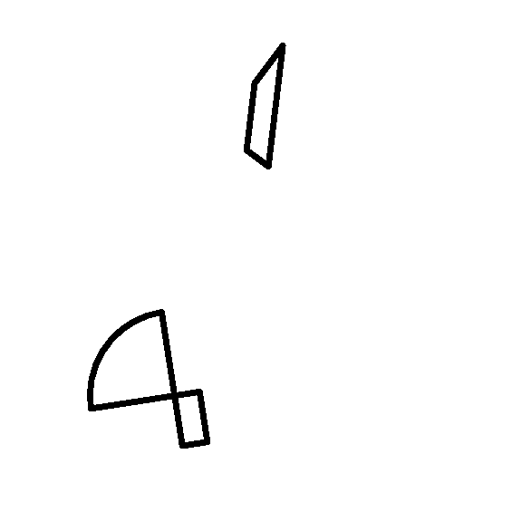

In [133]:
Image.fromarray(np.array(answers[0]))

# CLEVR

### Description

RAVEN's matrices tasks done on a generated images with 3D shapes. Tasks are defined in the form of .npz files (can be loaddedd with numpy). Each task consists of image and target answer. Image is a 16 x 240 x 320 x 3 numpy array (16 images, 8 for task, 8 for answers, each of size 240 x 320 and RGB).   
The filename determines if the task is for train, test or val dataset.

### Data Acquisition

Data can be downloaded from [this link](https://app.globus.org/file-manager?destination_id=dc43f461-0ca7-4203-848c-33a9fc00a464&destination_path=%2Fn42z-hb72%2F) (Globus link, requires account and additional software).

In [7]:
file_clevr = np.load(PATH+'CLEVR/problem1/' + os.listdir(PATH+'CLEVR/problem1/')[2])

In [8]:
file_clevr.files
# no additional info

['image', 'target']

In [9]:
file_clevr['image'].shape

(16, 240, 320, 3)

In [137]:
context = torch.tensor(file_clevr['image'][:8])
answers = torch.tensor(file_clevr['image'][8:])
target = torch.tensor(file_clevr['target'])

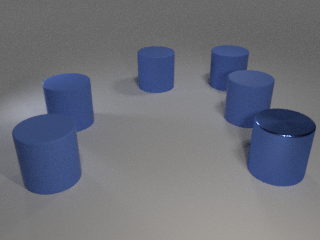

In [76]:
Image.fromarray(file_clevr['image'][0].astype(np.uint8))

# deepiq-ooo

### Description

An Odd-One-Out task with generated shapes. The tasks are in the form of .png files (each task is a single file). Each shape is of the size 100 x 100, so a task consisting of 4 shapes is of size 100 x 400. The tasks consist of either 4 or 5 shapes (in the latter case it is o size 100 x 500). The answers are given in a form of a .csv file.

### Data Acquisition

The data may be downloaded from [this link](https://github.com/deepiq/deepiq/blob/master/odd-one-out%20test%20examples.zip) (a .zip file in a Github repository). [Link to the repository](https://github.com/deepiq/deepiq)

In [33]:
file_deepiq = Image.open(PATH + 'deepiq-ooo/' + os.listdir(PATH + 'deepiq-ooo/')[500])
answers_deepiq = pd.read_csv(PATH + 'deepiq-ooo/answers.csv', header=None)

In [6]:
def split_ooo_images(image):
    images = []
    for window in range(0, image.size[0], 100):
        images.append(np.array(image)[:,window:window+100])
    return images

In [7]:
images = split_ooo_images(file_deepiq)

In [8]:
context = torch.tensor(np.array(images))
target = answers_deepiq[0][500]

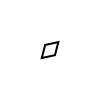

In [10]:
Image.fromarray(np.array(images)[0])

# dopt

### Description

The dataset for the Visual Extrapolation Problem. It consists of **n** tasks (**n** is a parameter, here set to 500). Each task consists of 20 images of size 64 x 64, greyscale. The images represent a progression of some value of an abstract generated 2D shape (such as size growth or position). The task is to generate a new image that completes the progression. It is, however, also possible to create a classification task for this dataset: it is possible to take the last 4 images as possible answers and task the test-taker to choose the one to complete the sequence. Another possibility is to sample answers from other tasks, or possibly generate other answers.   
The data is stored in the form of .npy file of size n x 20 x 64 x 64 (n tasks 20 elements each of size 64 x 64, greyscale).

### Data Acquisition

The data may be generated using code from [this link](https://github.com/taylorwwebb/learning_representations_that_support_extrapolation/tree/master/dynamic_object_prediction). The requirements are defined in the Readme of [this repository](https://github.com/taylorwwebb/learning_representations_that_support_extrapolation/tree/master). The code runs without problems with python 3.9 and later. It was tested on windows.   
The number of tasks generated may be changed by passing a new value to the **num_ex** parameter in the *create_test_set* function. It is also beneficial to comment the last 3 lines of the script (inside *if __name__ == "__main__":* block), as those are responsible for model training and are not necessary for dataset generation.

In [206]:
file_dopt = np.load(PATH + 'dopt/' + os.listdir(PATH + 'dopt/')[0])

In [208]:
file_dopt.shape # 500 examples, 20 elements each, size 64 by 64

(500, 20, 64, 64)

In [231]:
context = torch.tensor(file_dopt[0])

There are no answers and target since this is a generation task. It is possible to artficially create answers, however -- we can e.g. take 4 last elements and mix them, or sample elements from different problems.

Example of taking the last 4 panels:

In [234]:
context = torch.tensor(file_dopt[0][:16])

In [267]:
answers = file_dopt[0][16:]
idx = list(range(len(answers)))
random.shuffle(idx)
answers = answers[idx]

In [270]:
target = torch.tensor(idx.index(0))

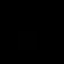

In [230]:
Image.fromarray((file_dopt[0][0]*255).astype(np.int8)) # it displays as all black but it isn't

# dsprites-ooo

### Description

Odd-One-Out tasks created using the [DsPrites dataset](https://github.com/google-deepmind/dsprites-dataset). This dataset is then reshaped to create an Odd-One-Out task. The author provides code (located on [his repository](https://github.com/SalmanMohammadi/odd-one-out-representation-learning)) for sampling pairs and triples of dsprites with similar properties. However, OOO tasks created in this way are unlabeled and not very reliable. As an alternative, we propose our own class (Dsprites_OOO) to create OOO tasks consisting of 4 shapes sampled from the dataset. The class is defined later in this section.

### Data Acquisition

The dataset can be downloaded [from this link](https://github.com/google-deepmind/dsprites-dataset/blob/master/dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz) ([.npz file in a Dsprites repository](https://github.com/google-deepmind/dsprites-dataset))

Exploring dsprites dataset

In [4]:
file_dsprites = np.load(PATH + 'dsprites-ooo/dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz', allow_pickle=True, encoding='latin1')

In [5]:
file_dsprites.files

['metadata', 'imgs', 'latents_classes', 'latents_values']

In [23]:
file_dsprites['metadata'][()]

{'date': 'April 2017',
 'description': 'Disentanglement test Sprites dataset.Procedurally generated 2D shapes, from 6 disentangled latent factors.This dataset uses 6 latents, controlling the color, shape, scale, rotation and position of a sprite. All possible variations of the latents are present. Ordering along dimension 1 is fixed and can be mapped back to the exact latent values that generated that image.We made sure that the pixel outputs are different. No noise added.',
 'version': 1,
 'latents_names': ('color', 'shape', 'scale', 'orientation', 'posX', 'posY'),
 'latents_possible_values': {'orientation': array([0.        , 0.16110732, 0.32221463, 0.48332195, 0.64442926,
         0.80553658, 0.96664389, 1.12775121, 1.28885852, 1.44996584,
         1.61107316, 1.77218047, 1.93328779, 2.0943951 , 2.25550242,
         2.41660973, 2.57771705, 2.73882436, 2.89993168, 3.061039  ,
         3.22214631, 3.38325363, 3.54436094, 3.70546826, 3.86657557,
         4.02768289, 4.1887902 , 4.34989

In [7]:
file_dsprites['latents_classes']

array([[ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  2],
       ...,
       [ 0,  2,  5, 39, 31, 29],
       [ 0,  2,  5, 39, 31, 30],
       [ 0,  2,  5, 39, 31, 31]], dtype=int64)

In [18]:
file_dsprites['latents_values']

array([1.        , 1.        , 0.5       , 0.        , 0.        ,
       0.12903226])

In [10]:
file_dsprites['latents_classes'].shape

(737280, 6)

In [11]:
file_dsprites['imgs'].shape

(737280, 64, 64)

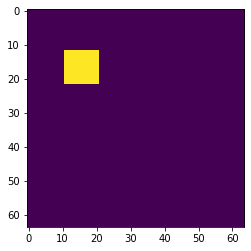

In [15]:
plt.imshow(file_dsprites['imgs'][1])

Odd One Out dsprites

In [35]:
from dsprites_data import *

In [68]:
dsprites_loader = DSpritesLoader(npz_path='all_data/dsprites-ooo/dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz')
data = DataLoader(IterableDSpritesIIDTriplets(dsprites_loader=dsprites_loader, batch_size=5, k=1),
                                        batch_size=1)
x1, x2, x3 = next(iter(data))
print(x1.shape)
x1 = x1.reshape(5, 64, 64)
x2 = x2.reshape(5, 64, 64)
x3 = x3.reshape(5, 64, 64)

torch.Size([1, 5, 64, 64])


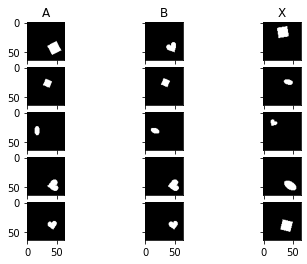

In [69]:
fig, axes = plt.subplots(5, 3, sharex=True, sharey=True)
for i in range(5):
    axes[i][0].imshow(x1[i], cmap='Greys_r')
    axes[i][1].imshow(x2[i], cmap='Greys_r')
    axes[i][2].imshow(x3[i], cmap='Greys_r')
axes[0][0].set_title("A")
axes[0][1].set_title("B")
axes[0][2].set_title("X")
fig.subplots_adjust()
plt.show()

Not sure about the validity of this dataset -- maybe we could do our own

Creating our own dataset.  
The idea is that  we sample 3 sprites that differ along 1 axis only, and then sample the 4th sprite that differs in 2 axes (the same as the others + one additional). This way, we create an odd one out.

In [28]:
import random
from copy import copy

class Dsprites_OOO():
    def __init__(self, seed = None):
        if seed:
            random.seed(seed)
        with np.load(PATH + 'dsprites-ooo/dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz', allow_pickle=True, encoding='latin1') as file_dsprites:
            self.latent_sizes = file_dsprites['metadata'][()]['latents_sizes']
            self.latent_idxes = np.concatenate((self.latent_sizes[::-1].cumprod()[::-1][1:], np.array([1,])))
            self.dsprites = file_dsprites['imgs']
            
            
    def latent_dist_to_index(self, lat_dist):
        return np.dot(lat_dist, self.latent_idxes)
    
    
    def return_initial_dist(self):
        dist = [0 for i in range(len(self.latent_sizes))]
        for i, size in enumerate(self.latent_sizes):
            dist[i] = random.randint(0, size-1)
        return dist
    
    
    def return_new_dists(self, initial_dist, idxs):
        vals_1 = random.sample([i for i in range(self.latent_sizes[idxs[0]]) if i != initial_dist[idxs[0]]], k=3)
        vals_2 = [initial_dist[idxs[1]] for _ in range(2)] + random.sample([i for i in range(self.latent_sizes[idxs[1]]) if i != initial_dist[idxs[1]]], k=1)
        new_dists = []
        for val, val2 in zip(vals_1, vals_2):
            new_dist = copy(initial_dist)
            new_dist[idxs[0]] = val
            new_dist[idxs[1]] = val2
            new_dists.append(new_dist)
        return new_dists
        
    
    def return_ooo(self, n):
        tasks = []
        targets = []
        latents = []
        for _ in range(n):
            new_task = self.return_single_task()
            tasks.append(new_task[0])
            targets.append(new_task[1])
            latents.append(new_task[2])
        
        return tasks, targets, latents
    
    def return_single_task(self):
        latent_types = sorted(random.sample(list(range(1, 6)), k=2), reverse=True)
        latent_dist = self.return_initial_dist()
        dists = [latent_dist, *self.return_new_dists(latent_dist, latent_types)]
        
        ooo_tasks = np.array([self.dsprites[self.latent_dist_to_index(dist)] for dist in dists])
        # random permutation of tasks
        
        task_idxes = list(range(4))
        random.shuffle(task_idxes)
        
        ooo_tasks = ooo_tasks[task_idxes]
        ooo_target = task_idxes.index(3)
        return ooo_tasks, ooo_target, latent_types
          

In [29]:
tasker = Dsprites_OOO(12)

In [34]:
ooo_task, ooo_target, a = tasker.return_ooo(500)

In [37]:
ooo_target[0]

0

In [33]:
ooo_task[0]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

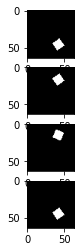

In [51]:
fig, ax = plt.subplots(4)

for i in range(4):
    ax[i].imshow(ooo_task[461][i], cmap='Greys_r')

# g-set

### Description

RAVEN matrices dataset of generated 2D shapes. It is stored in the form of .png files. Each task comprises of two files: a "test" file (file named *xxx_test*, where xxx is the task number) and "answers" file (*xxx_answers*). Each test context comprises of 8 shapes, and each answer set -- of 5 shapes. The answers are stored in the answers.csv file. There are also additional .csv files containing information such as figure type, the fill color or figure shapes.  
Each contet file is of size 150 x 150, and the answers are of size 50 x 250, meaning that a single shape is of size 50 x 50.

### Data Acquisition

The data may be generated from the code from the [dataset reporsitory](https://github.com/jakfol1217/Duel-IQ-fork/tree/main/dataset_generator/IQTestGenerator). It is written in the C# language and generated as an executable file. The main script is the `MainWindow.xaml.cs` file. In it, it is possible to define the path to which the tests are to be saved, as well as the number of tests to be generated (**basePath** and **testInstances** parameters inside the file).
There are, however, some discrepancies in the paths defined in the main script file. This caused it to not compile properly on the Windows system, on which it was tested. An alterred version that compiles correctly has been uploaded [on this fork](https://github.com/jakfol1217/Duel-IQ-fork).

In [29]:
num = 10
file_gset    = Image.open(PATH + f'g-set/{num:05}_test.png')
answers_gset = Image.open(PATH + f'g-set/{num:05}_answers.png')
targets_gset = pd.read_csv(PATH + 'g-set/answers.csv', header=None)
# additional info are in different csv files

In [31]:
np.array(file_gset).shape

(150, 150, 4)

In [32]:
np.array(answers_gset).shape

(50, 250, 4)

In [12]:
def split_gset_answer(image):
    images = []
    for window in range(0, image.size[0], 50):
        images.append(np.array(image)[:,window:window+50])
    return images

In [13]:
def split_gset_context(image):
    images = []
    for window_w in range(0, image.size[0], 50):
        for window_h in range(0, image.size[1], 50):
            images.append(np.array(image)[window_w:window_w+50,window_h:window_h+50])
    return images[:-1]

In [14]:
context_panels = split_gset_context(file_gset)

In [15]:
answer_panels = split_gset_answer(answers_gset)

In [17]:
context = torch.tensor(np.array(context_panels))
answers = torch.tensor(np.array(answer_panels))
target = torch.tensor(targets_gset[0][num])

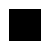

In [18]:
Image.fromarray(np.array(context_panels)[0])

# i-Raven

### Description

RAVEN matrices dataset with generated 2D shapes. Each task is defined in the form of a .npz file, which contains the task itself, target answer and some additional information. The tasks are 16 x 160 x 160 (meaning 16 images of size 160 x 160). 8 images create the task context and there are 8 possible answers. The images are in greyscale. The tasks are groupped in folders based on the regime in which they were created.

### Data Acquisition

The dataset can be downloaded by following [this link](https://drive.google.com/file/d/1SxhImd29PLtlvqXAhlkH-CVDfFRzcK7y/view) (Google drive).

In [164]:
file_raven = np.load(PATH + 'i-Raven/center_single/' + os.listdir(PATH + 'i-Raven/center_single/')[0], allow_pickle=True)

In [165]:
file_raven.files

['image',
 'mask',
 'obj_class',
 'brightness',
 'size',
 'LR',
 'UD',
 'pos',
 'N_pos',
 'targ',
 'format',
 'any_arithmetic']

In [158]:
file_raven['image'].shape

(16, 160, 160)

In [160]:
context = torch.tensor(file_raven['image'][:8])
answers = torch.tensor(file_raven['image'][8:])
target = torch.tensor(file_raven['targ'])

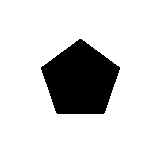

In [177]:
Image.fromarray(file_raven['image'][0].astype(np.uint8))

# MNS

### Description

A dataset of Visual Arithmetic Problems consisting of 2D shapes and integer values. The tasks are in the form of .npz files containg the task images, the target answer as well as the listings of all integers and math operations used to retrieve the answer. The tasks are of the shape 3 x 300 x 300, with 3 images of size 300 x 300 in greyscale. The last image contains one '?' sign instead of a number -- this sign is to be replaced with the answer.   
The data is groupped into 3 folders -- one for training set, one for testing and one for validation. The names of the .npz files describe the generation regime of the given task.

### Data Acquisition

The dataset may be downloaded from [this link](https://drive.google.com/file/d/17KuL8KOIDAeRL-lD418oiDEm8bE6TEFb/view) (Google drive).   
Alternatively, it may be generated using the code from the [dataset repository](https://github.com/zwh1999anne/Machine-Number-Sense-Dataset/tree/master). It requires Python in version 2.7, along with some dependencies defined in the requirements.txt files. The dataset is generated by invoking the `main.py` script located in the `src\dataset\` path. The number of the tasks generated is adjustable inside this file, in the main function (**num_prob** parameter).   
Please note that the code runs on the older version of Python (**2.7**). What is more, a step creating the files to put the dataset into is required for the code to run properly (tested on Windows). The code with the step added is available [on this fork](https://github.com/jakfol1217/Machine-Number-Sense-Dataset).

In [147]:
file_mns = np.load(PATH + 'MNS/train_set/' + os.listdir(PATH + 'MNS/train_set/')[0])

In [148]:
file_mns.files

['center',
 'mathematical_conditions',
 'geometrial_conditions',
 'image',
 'math_operators',
 'int_list_1',
 'int_list_3',
 'int_list_2',
 'prob_type',
 'target']

In [149]:
file_mns['image'].shape

(3, 300, 300)

In [150]:
context = torch.tensor(file_mns['image'])
target = torch.tensor(file_mns['target'])

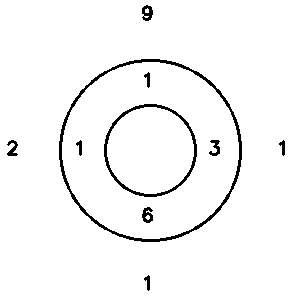

In [151]:
Image.fromarray(file_mns['image'][0].astype(np.uint8))

In [152]:
file_mns['int_list_1']

array([2, 9, 1, 1, 1, 1, 3, 6])

In [153]:
file_mns['math_operators']

array([b'*', b'+', b'*'], dtype='|S1')

# PGM

### Description

RAVEN matrices tasks comprised of generated 2D shapes. The data is in the form of .npz files containg the image (160 x 160 x 16), target and some meta information. The task is comprised of 16 160 x 160 grayscale images. The tasks are groupped into folders corresponding to different training regimes (8 folders in total). They are storred in the form of gzipped folders. The .npz file names contain information if the problem belongs to the test, train or validation set.

### Data Acquisition

The data may be downloaded from [this link](https://console.cloud.google.com/storage/browser/ravens-matrices;tab=objects?prefix=&forceOnObjectsSortingFiltering=false) (Google cloud storage bucket)

In [56]:
file_pgm = np.load(PATH + 'PGM/' + os.listdir(PATH + 'PGM/')[0])

In [57]:
file_pgm.files

['relation_structure_encoded',
 'image',
 'target',
 'meta_target',
 'relation_structure']

In [60]:
file_pgm['image'].shape

(160, 160, 16)

In [62]:
image = file_pgm['image'].reshape(16,160,160)

In [67]:
context = torch.tensor(image[:8])
answers = torch.tensor(image[8:])
target = torch.tensor(file_pgm['target'])

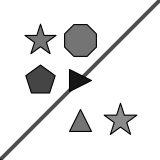

In [77]:
Image.fromarray(image[0].astype(np.uint8))

# svrt

### Description

Same-differet task with generated 2D shapes. The dataset consists of .png images grouped into 23 classes (represented by folders). Each class futher consists of 2 groups of problems. Each group counts 100 images with shapes. The images are of the size 128 x 128 x 3. The groups inside classes are identified by file names (group 0 files are named sample_0_xxx, group 1 -- sample_1_xxx).   
The tasks are created by sampling n+1 images from each group in a class (2n images create the context and the additional 2 are to be assigned to groups).   
The datas is stored in the form of .png files inside 23 folders.

### Data Acquisition

The data may be generated by running the code from [this repository](https://fleuret.org/cgi-bin/gitweb/gitweb.cgi?p=svrt.git;a=tree;hb=HEAD). Simply clone the repository on a Linux machine and run the `doit.sh` file. It compiles on any Linux machine, but requires the `png` and `jpeg` libraries installed.

Analogous to bongard, but we can choose the number of elements in each group: parameter n

In [10]:
path_svrt = PATH + 'svrt/results_problem_1/'

In [11]:
group_0 = os.listdir(PATH + 'svrt/results_problem_1/')[:100]
group_1 = os.listdir(PATH + 'svrt/results_problem_1/')[100:]

In [13]:
n = 6

In [16]:
context = random.sample(group_0, n+1) + random.sample(group_1, n+1)
context = [np.array(Image.open(path_svrt + c)) for c in context]

In [359]:
answers = []
answers.append(context.pop(random.randint(0, n)))
answers.append(context.pop(random.randint(n, 2*n)))

In [360]:
# random answer flip
if random.uniform(0,1) <= 0.5:
    target = torch.tensor([0,1])
else:
    target = torch.tensor([1,0])
    answers = answers[::-1]

In [362]:
context = torch.tensor(np.array(context))
answers = torch.tensor(np.array(answers))

In [363]:
target

tensor([1, 0])

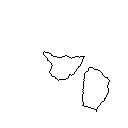

In [393]:
Image.fromarray(np.array(context[0]))

# vaec

### Description

It consists of The dataset for the Visual Extrapolation Problem. The tasks are created using generated 2d shapes. Each image is of size 128 x 128 x 3. There are 7 images in each task -- 3 providing the task context and 4 possible answers. The dataset consists of 12 .hy files, each containing around 19,000 tasks. There are also 2 generation regimes: scale and trans. The .hy files contain the information about being the part of the training or testing set in their name (they contain words either "train" or "test".

### Data Acquisition

The data may be generated by using the code from the original [dataset repository](https://github.com/taylorwwebb/learning_representations_that_support_extrapolation/tree/master/VAEC_dataset_and_models/dset_gen).     
Both files (`VAEC_scale_extrap.py` `VAEC_trans_extrap.py`) need to be invoked. They do not take any parameters. They were run without problems on windows system with python 3.9. The additional library requirements are listed on [the main page of the repository](https://github.com/taylorwwebb/learning_representations_that_support_extrapolation/tree/master).


In [4]:
import h5py

In [5]:
file_vaec = h5py.File(PATH + 'vaec/' + os.listdir(PATH + 'vaec/')[0])

In [6]:
len(file_vaec)

19040

In [7]:
file_vaec['0'].keys()

<KeysViewHDF5 ['ABCD', 'analogy_dim', 'dist', 'imgs', 'latent_class', 'not_D']>

In [8]:
file_vaec['0']['imgs']

<HDF5 dataset "imgs": shape (7, 128, 128, 3), type "|u1">

In [9]:
len(file_vaec['0']['imgs'][list(file_vaec['0']['ABCD'])[:3]])

3

In [40]:
context = torch.tensor(file_vaec['0']['imgs'])[list(file_vaec['0']['ABCD'])[:3]]
idx = [i for i in list(file_vaec['0']['not_D']) if i not in list(file_vaec['0']['ABCD'])] + [list(file_vaec['0']['ABCD'])[3]]
random.shuffle(idx)
answers = torch.tensor(file_vaec['0']['imgs'])[idx]
target = torch.tensor(idx.index(list(file_vaec['0']['ABCD'])[3]))

In [42]:
answers.shape

torch.Size([4, 128, 128, 3])

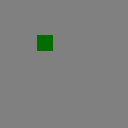

In [261]:
Image.fromarray(file_vaec['0']['imgs'][0].astype(np.uint8))

# VAP

### Description

Visual analogy problem defined consisting of generated 2D shapes. The problems are stored in the form of .nnpz files. Each file contains the task images, target and the meta info about the structures used. Each task is of shape 160 x 160 x 9 (meaning 9 160 x 160 images in greyscale). 5 images serve as the task context, and 4 images are the possible answers.    
The tasks are stored inside 5 gzipped folders representing different training regimes. The .npz file names contain information if the problem belongs to the test, train or validation set.

### Data Acquisition

The data may be downloaded from [this link](https://console.cloud.google.com/storage/browser/ravens-matrices/analogies?pageState=(%22StorageObjectListTable%22:(%22f%22:%22%255B%255D%22))&prefix=&forceOnObjectsSortingFiltering=false) (Google cloud storage bucket)

In [106]:
file_vap = np.load(PATH + 'VAP/' + os.listdir(PATH + 'VAP/')[3])

In [107]:
file_vap.files

['relation_structure', 'target', 'image', 'relation_structure_encoded']

In [108]:
file_vap['image'].shape

(160, 160, 9)

In [109]:
image = file_vap['image'].reshape(9,160,160)

In [110]:
context = torch.tensor(image[:5])
answers = torch.tensor(image[5:])
target = torch.tensor(file_vap['target'])

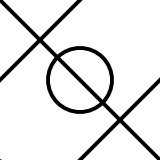

In [134]:
Image.fromarray(image[0].astype(np.uint8))

# VASR

### Description

The Visual Analogy Problem dataset comprised of real-life images. Each task is comprised of 7 images, 3 of which create the context of the task, and 4 are the possible answers. The images are of varying sizes, RGB and in .png format. The various dataset splits (train, test, gold silver etc) are defined in the form of .csv files, each row corresponding to a separate task, containing paths to the task images and some additional information such as labels, image object classifications etc.

### Data Acquisition

The dataset may be downloaded in part from the [huggingface page](https://huggingface.co/datasets/nlphuji/vasr#dataset-description).  
Alternatively, the .csv files may be downloaded from the [main dataset website](https://vasr-dataset.github.io/download). The image files come from the imSitu dataset and may be downloaded from the [main dataset website](http://imsitu.org/download/).
Another way to obtain the dataset is to use the code from the [official repository](https://github.com/vasr-dataset/vasr/tree/main/dataset). All the configuration options may be set in the `dataset_config.py` file (including which set split should be generated, e.g. test, train or val).  
First, the `install.sh` script from the [main page of the vasr repository](https://github.com/vasr-dataset/vasr/tree/main) needs to be invoked. It is used to download the necessary data, including the assests and the images themselves. Next, all the files from the `dataset\pipeline\` directory need to be invoked in alphabetical order. The additional library requirements are defined in the `requirements.txt` file. The code run without problems on Windows system with Python 3.9.


As images have different sizes, the context and answer panels are lists of tensors. We could either resize the images or leave it as that (perhaps change others to also be like that).

In [175]:
vasr_path = PATH + 'VASR/vasr_images/'
num_vasr = 0

In [176]:
labels_vasr = pd.read_csv('D:/mcs/all_data/VASR/train_gold.csv')

In [203]:
context = []
context.append(torch.tensor(np.array(Image.open(vasr_path + labels_vasr['A_img'][num_vasr]))))
context.append(torch.tensor(np.array(Image.open(vasr_path + labels_vasr['B_img'][num_vasr]))))
context.append(torch.tensor(np.array(Image.open(vasr_path + labels_vasr['C_img'][num_vasr]))))

In [202]:
answers = []
import ast
for candidate in ast.literal_eval(labels_vasr['candidates'][num_vasr]):
    answers.append(torch.tensor(np.array(Image.open(vasr_path + candidate))))

In [188]:
for i, candidate in enumerate(labels_vasr['candidates'][num_vasr]):
    if candidate == labels_vasr['D_img'][num_vasr]:
        target = torch.tensor(i)

In [189]:
target

tensor(3)

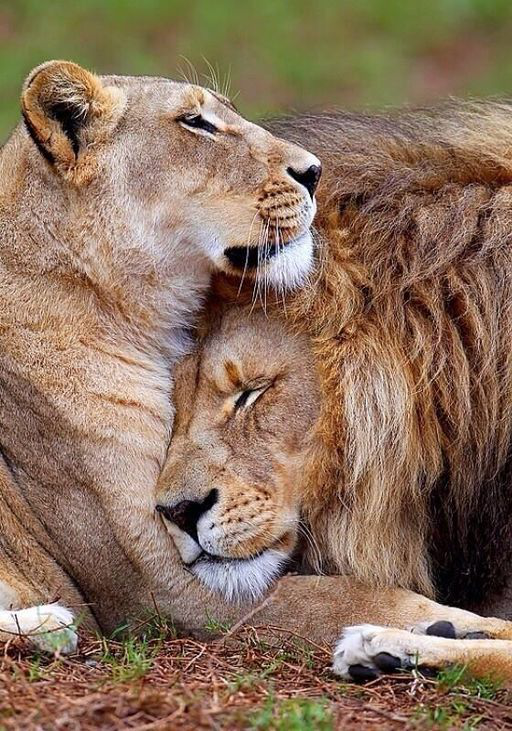

In [205]:
Image.fromarray(np.array(context[0]))